In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv(r"C:\Users\DELL\Downloads\Respiratory_Virus_Hospital_Admissions_Over_Time.csv")
print(df.head())

  week_start_date week_end_date  epi_week respiratory_virus  new_admissions  \
0      08-12-2024    14-12-2024        50               RSV              17   
1      09-02-2025    15-02-2025         7          COVID-19              19   
2      29-12-2024    04-01-2025         1               RSV              36   
3      28-09-2025    04-10-2025        40          COVID-19              26   
4      06-04-2025    12-04-2025        15          COVID-19              18   

   admission_rate_per_100k  sf_population_estimate   data_updated_at  \
0                     2.03                  836321  14-11-2025 08:05   
1                     2.27                  836321  14-11-2025 08:05   
2                     4.30                  836321  14-11-2025 08:05   
3                     3.11                  836321  14-11-2025 08:05   
4                     2.15                  836321  14-11-2025 08:05   

         data_as_of    data_loaded_at  
0  13-11-2025 11:25  14-11-2025 09:38  
1  13-11-202

In [5]:
df.groupby('respiratory_virus')['new_admissions'].describe()  


,count,mean,std,min,25%,50%,75%,max
respiratory_virus,,,,,,,,
COVID-19,56.0,19.321429,12.608954,3.0,11.75,16.0,23.0,66.0
Influenza,56.0,18.642857,32.746647,0.0,1.00,3.0,15.5,119.0
RSV,56.0,7.321429,10.829433,0.0,0.00,1.0,8.0,36.0


In [6]:
avg_newadmin = df.groupby('respiratory_virus')['new_admissions'].mean()
print("Average PM2.5 by Sensor Index:\n", avg_newadmin)


Average PM2.5 by Sensor Index:
 respiratory_virus
COVID-19     19.321429
Influenza    18.642857
RSV           7.321429
Name: new_admissions, dtype: float64


In [7]:
print("Interpretation:")

if avg_newadmin['Influenza'] > avg_newadmin['RSV']:
    print("Influenza has a higher average number of new hospital admissions compared to RSV.")
elif avg_newadmin['Influenza'] < avg_newadmin['RSV']:
    print("RSV has a higher average number of new hospital admissions compared to Influenza.")
    
else:
    print("Both Influenza and RSV have the same average number of new hospital admissions.")

Interpretation:
Influenza has a higher average number of new hospital admissions compared to RSV.


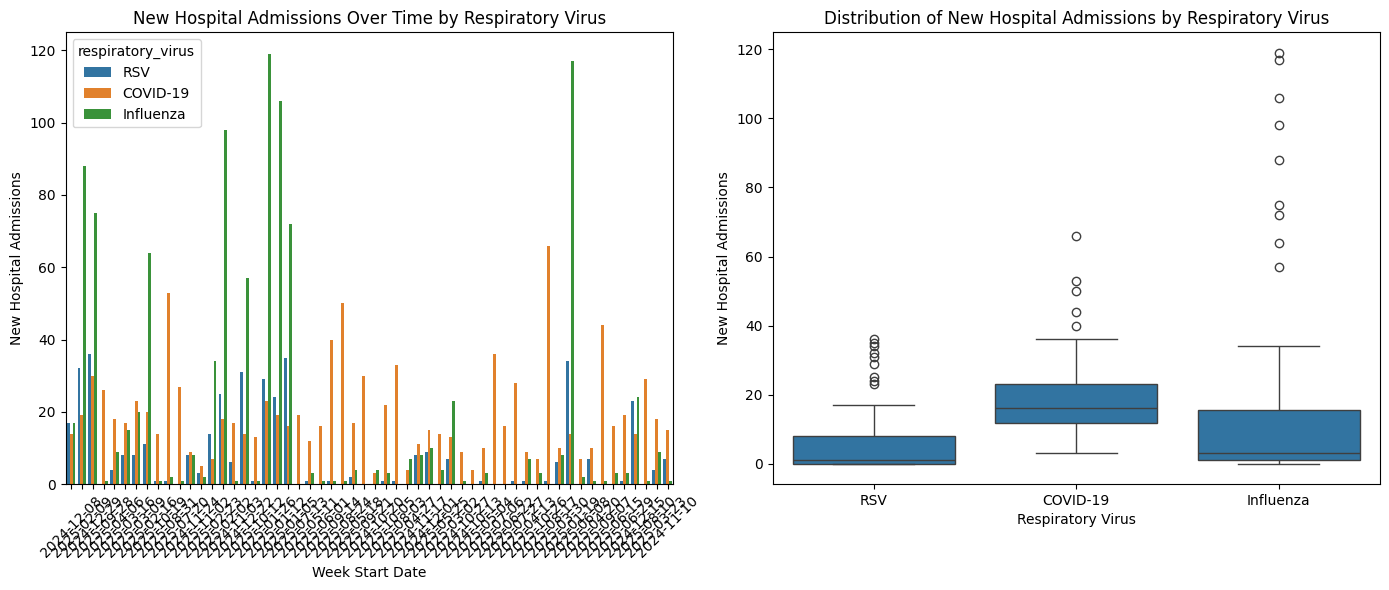

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['week_start_date'] = pd.to_datetime(df['week_start_date'], dayfirst=True, errors='coerce')

sns.barplot(data=df, x='week_start_date', y='new_admissions', hue='respiratory_virus', ax=axes[0])
axes[0].set_title('New Hospital Admissions Over Time by Respiratory Virus')
axes[0].set_xlabel('Week Start Date')
axes[0].set_ylabel('New Hospital Admissions')
for label in axes[0].get_xticklabels():
	label.set_rotation(45)
sns.boxplot(data=df, x='respiratory_virus', y='new_admissions', ax=axes[1])
axes[1].set_title('Distribution of New Hospital Admissions by Respiratory Virus')
axes[1].set_xlabel('Respiratory Virus')
axes[1].set_ylabel('New Hospital Admissions')

plt.tight_layout()
plt.show()

In [9]:
!pip install scipy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [10]:
# ensure SciPy is installed in this notebook environment, then import at top of the cell
%pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from scipy import stats

Influenza_number = df[df['respiratory_virus'] == 'Influenza']['new_admissions']
RSV_number = df[df['respiratory_virus'] == 'RSV']['new_admissions']
t_stat, p_value = stats.ttest_ind(Influenza_number, RSV_number, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in new hospital admissions between Influenza and RSV.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in new hospital admissions between Influenza and RSV.")


T-statistic: 2.4563554419128453, P-value: 0.016637946588243628
Reject the null hypothesis: There is a significant difference in new hospital admissions between Influenza and RSV.


In [12]:
Influenza=df[df['respiratory_virus']=='Influenza']['new_admissions']
RSV=df[df['respiratory_virus']=='RSV']['new_admissions']
COVID_19=df[df['respiratory_virus']=='COVID-19']['new_admissions']


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mean_influenza=Influenza.mean()
mean_rsv=RSV.mean()
mean_covid_19=COVID_19.mean()
std_influenza=Influenza.std(ddof=1)
std_rsv=RSV.std(ddof=1)
std_covid_19=COVID_19.std(ddof=1)
n_influenza=len(Influenza)
n_rsv=len(RSV)
n_covid_19=len(COVID_19)

print("Respiratory Virus Statistics:")
print("-"*30)
print("Mean of Paitents across Viruses:")
print("Mean Influenza:", mean_influenza)
print("Mean RSV:",mean_rsv)
print("Mean Covid-19:",mean_covid_19)
print("-"*30)
print("Standard Deviation of Paitents across Viruses:")

print("Standard Deviation Influenza:",std_influenza)
print("Standard Deviation RSV:",std_rsv)
print("Standard Deviation Covid-19:",std_covid_19)
print("-"*30)
print("Number of Patients across Viruses:")

print("Number of Influenza Paitents:",n_influenza)
print("Number of RSV Paitents",n_rsv)
print("Number of Covid-19 Paitents:",n_covid_19)


Respiratory Virus Statistics:
------------------------------
Mean of Paitents across Viruses:
Mean Influenza: 18.642857142857142
Mean RSV: 7.321428571428571
Mean Covid-19: 19.321428571428573
------------------------------
Standard Deviation of Paitents across Viruses:
Standard Deviation Influenza: 32.7466465022429
Standard Deviation RSV: 10.829433197384958
Standard Deviation Covid-19: 12.608953734775708
------------------------------
Number of Patients across Viruses:
Number of Influenza Paitents: 56
Number of RSV Paitents 56
Number of Covid-19 Paitents: 56


Z-Test (Checking Sample vs Population Mean)

If p-value<0.05--> the paitents's average number is  different from 70

If p-value>0.05 --> the student's average score is similar to 70

It checks whether th no. of paitent's average number in your dataset is different ot not from the overall paitent numbers
 

In [14]:
Mean_of_Population=df['new_admissions'].mean()
Std_of_Population=df['new_admissions'].std(ddof=1)

z_stats=(Mean_of_Population-Std_of_Population)/(Std_of_Population/np.sqrt(len(df)))

p_value=2*(1-stats.norm.cdf(abs(z_stats)))

print(f"Z-Statistics:{z_stats}\nP-value:{p_value:4f}")



Z-Statistics:-3.98059865589245
P-value:0.000069


In [ ]:
t_stat_Influenza_RSV, p_value_Influenza_RSV = stats.ttest_ind(Influenza, RSV, equal_var=False)
print(f"Influenza vs RSV -> T-statistic: {t_stat_Influenza_RSV:.4f}, P-value: {p_value_Influenza_RSV:.4f}")

t_stat_Influenza_COVID, p_value_Influenza_COVID = stats.ttest_ind(Influenza, COVID_19, equal_var=False)
print(f"Influenza vs COVID-19 -> T-statistic: {t_stat_Influenza_COVID:.4f}, P-value: {p_value_Influenza_COVID:.4f}")

t_stat_RSV_COVID, p_value_RSV_COVID = stats.ttest_ind(RSV, COVID_19, equal_var=False)
print(f"RSV vs COVID-19 -> T-statistic: {t_stat_RSV_COVID:.4f}, P-value: {p_value_RSV_COVID:.4f}")

Influenza vs RSV -> T-statistic: 2.4564, P-value: 0.0166
Influenza vs COVID-19 -> T-statistic: -0.1447, P-value: 0.8853
RSV vs COVID-19 -> T-statistic: -5.4027, P-value: 0.0000


In [23]:
var_influenza=Influenza.var(ddof=1)
var_rsv=RSV.var(ddof=1)
var_covid_19=COVID_19.var(ddof=1)

F1=var_influenza/var_rsv
F2=var_influenza/var_covid_19
F3=var_rsv/var_covid_19

df_influenza=n_influenza-1
df_rsv=n_rsv-1
df_covid_19=n_covid_19-1

p_value_F1=2*(1-stats.f.cdf(F1,df_influenza,df_rsv))
p_value_F2=2*(1-stats.f.cdf(F2,df_influenza,df_covid_19))
p_value_F3=2*(1-stats.f.cdf(F3,df_rsv,df_covid_19))

print(f"F-Statsics Influenza vs RSV:{F1}\nP-value:{p_value_F1:4f}")
print(f"F-Statsics Influenza vs COVID-19:{F2}\nP-value:{p_value_F2:4f}")
print(f"F-Statsics RSV vs COVID-19:{F3}\nP-value:{p_value_F3:4f}")

F-Statsics Influenza vs RSV:9.143705081780228
P-value:0.000000
F-Statsics Influenza vs COVID-19:6.74490070985713
P-value:0.000000
F-Statsics RSV vs COVID-19:0.7376551025576096
P-value:1.737727


Reject the null hypothesis: There is a significant difference in variances between Influenza and RSV.
